In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.18.0'

In [3]:
dataset = pd.read_csv('Suicidal_redit.csv',usecols=['Title','Post','Label'], encoding='latin1')

In [4]:
X = dataset.iloc[:15000, :-1].values

In [5]:
print(X)

[["I'm looking for a girl I've met at the Polish airport to thank her properly!"
  "I've tried Polish spotted pages but I guess she isn't there. But I know she's active on this sub so... WHY THE HELL NOT?\n\nIf you see this - you don't need to let me know. Just read it. I just want to thank you for not being indifferent.\n\n2 weeks ago I was in a very bad place. My gf broke up with me just before I got into the plane and I landed just to find out my luggage got lost and like the last idiot I had there my cards and money. And I don't know Polish language. Like a real, adult man, I just sat there and cried like a baby, exhausted after very long trip.\n\nThat Polish girl came already holding a cup with hot chocolate for me, asking if she could help in any way. We talked, she helped me with the luggage, helped me with the directions to my hotel and gave me money to get there. And we started talking about random things (like reddit) and for that I'm very thankful, you distracted me. \n\nI c

In [6]:
import re
import nltk 
nltk.download('stopwords') #These are words which are 'the','a' etc not helping in getting sentiment
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prafu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
corpus = []
for i in range(0,15000):
    text = X[i] 
    if isinstance(text, float): 
        text = "" 
    review = re.sub('[^a-zA-Z]',' ', str(text))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    filter_review = []
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    for word in review:
        if not word in set(all_stopwords):
            filter_review.append(ps.stem(word))

    filter_review = ' '.join(filter_review)
    corpus.append(filter_review)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1400)
X = cv.fit_transform(corpus).toarray()
y = dataset['Label'].iloc[:15000].values

In [9]:
print(y)

['Non-Suicidal' 'Non-Suicidal' 'Non-Suicidal' ... 'Suicidal' 'Suicidal'
 'Suicidal']


In [10]:
from sklearn.preprocessing import LabelEncoder
sc = LabelEncoder()
y = sc.fit_transform(y)

In [11]:
print(np.unique(y))

[0 1]


In [12]:
for label in np.unique(y):
    print(label)

0
1


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [14]:
ann = tf.keras.models.Sequential()

In [15]:
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))

In [16]:
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [18]:
ann.compile(optimizer ='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [19]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.7502 - loss: 0.5524
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9383 - loss: 0.2163
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9477 - loss: 0.1589  
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9538 - loss: 0.1448
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9590 - loss: 0.1196  
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9569 - loss: 0.1193  
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9667 - loss: 0.1051  
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.9659 - loss: 0.1067
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9661 - loss: 0.0974  
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9707 - loss: 0.0862
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.9742 - loss: 0.0807
Epoch 12/100
375/37

In [20]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
[[1 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


0.903


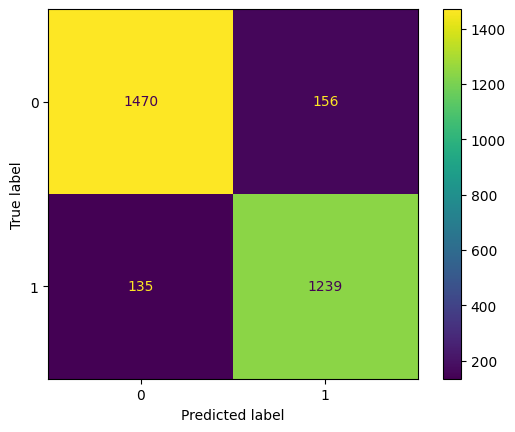

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
print(accuracy_score(y_pred, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [23]:
ann.save("sentiment_ann.keras") 

In [24]:
from tensorflow.keras.models import load_model
ann = load_model("sentiment_ann.keras")


C:\Users\prafu\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
